# In this notebook we quantitatively evalutation the computational difficulty of continuous MAMP brought by tunnel environment 

In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from time import time
import pickle as pkl
import random
from tqdm import trange



%load_ext autoreload
%autoreload 2

In [2]:
def flowtime(plan):
    return np.sum([t[-1] for t,x in plan])

## Single-tunnel environment

In [3]:


# 2D Tunnel navigation environment
def create_env(N,tunnel_width,tunnel_length):
    start_box_side = np.array([1,1])
    goal_box_side = np.array([1,1])

    top, bottom = 6,-6
    start_x_offset = 7
    goal_x_offset = 9

    if N % 2==0:
        lN = rN = N//2
    else:
        lN = N//2
        rN = lN+1

    start_locs = np.vstack([
    np.vstack([np.ones(lN)*start_x_offset,np.linspace(top,bottom, lN)]).T,
    np.vstack([np.ones(rN)*(-start_x_offset),np.linspace(top,bottom, rN)]).T])

    goal_locs = np.vstack([
    np.vstack([np.ones(lN)*(-goal_x_offset),np.linspace(bottom,top, lN)]).T,
    np.vstack([np.ones(rN)*goal_x_offset,np.linspace(bottom,top, rN)]).T])


    starts = [box_2d_center(s,start_box_side) for s in start_locs]
    goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
    limits = [(-10.0,10.0),(-10.0,10.0)]

    O1 = Box2DRegion((-tunnel_length/2,tunnel_length/2),(tunnel_width/2,10))
    O2 = Box2DRegion((-tunnel_length/2,tunnel_length/2),(-10,-tunnel_width/2))
    env = NavigationEnv(limits,[O1,O2],starts,goals)


    # Construct the hybrid graph representation of the environment
    bloating_r = 0.5 
    HG =  HybridGraph(env,bloating_r,K = 4)
    return env, HG

In [4]:
from panav.SAMP import Tube_Planning
from panav.util import unique_tx


def planning(env,HG):
    bloating_r = HG.agent_radius
    agents = set(np.arange(len(env.starts)))

    plan = []
    times = []
    t0 = time()
    success = True
    fail_time = None
    for agent in agents:
        print(agent)
        
        start = env.starts[agent]
        goal = env.goals[agent]

        agent_success = False
        
        for K in [7]:
            results = Tube_Planning(env,start,goal,HG.vmax,bloating_r,\
                                        plan,\
                                        HG.d,K,ignore_finished_agents=False)
            if results is not None:
                t,xs = results
                times.append(time()-t0)
                # print(times)
                t,xs = unique_tx(t,xs)
                plan.append((t,xs))
                agent_success = True
                break
            

        if not agent_success:
            print("Solution failed.")
            success = False
            times.append(time()-t0)
            break
    return plan,times


In [5]:
N = 8
rep = 20

In [6]:
# np.random.seed(12312)
# random.seed(10)

narrow_ts = []
tunnel_length = 5
tunnel_width = 1
print("N:",N)
env, HG = create_env(N,tunnel_width,tunnel_length)
# ax = plt.gca()
# draw_env(env,show_agent_ID=True)
# plt.show()

for _ in trange(rep):  
    p,ts = planning(env,HG)
    narrow_ts.append(ts)
    with open('./data/narrow_tunnel.pkl','wb') as fp:
        pkl.dump(narrow_ts,fp)


N: 8
Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-15


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
  0%|          | 0/20 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7


  5%|▌         | 1/20 [04:38<1:28:06, 278.24s/it]

0
1
2
3
4
5
6
7


 10%|█         | 2/20 [06:09<50:27, 168.22s/it]  

0
1
2
3
4
5
6
7


 15%|█▌        | 3/20 [06:57<32:08, 113.41s/it]

0
1
2
3
4
5
6
7


 20%|██        | 4/20 [07:42<22:59, 86.22s/it] 

0
1
2
3
4
5
6
7


 25%|██▌       | 5/20 [08:13<16:34, 66.29s/it]

0
1
2
3
4
5
6
7


 30%|███       | 6/20 [09:04<14:18, 61.29s/it]

0
1
2
3
4
5
6
7


 35%|███▌      | 7/20 [11:43<20:11, 93.22s/it]

0
1
2
3
4
5
6
7


 40%|████      | 8/20 [13:25<19:10, 95.90s/it]

0
1
2
3
4
5
6
7


 45%|████▌     | 9/20 [14:35<16:04, 87.71s/it]

0
1
2
3
4
5
6
7


 50%|█████     | 10/20 [15:39<13:24, 80.40s/it]

0
1
2
3
4
5
6
7


 55%|█████▌    | 11/20 [18:09<15:17, 101.95s/it]

0
1
2
3
4
5
6
7


 60%|██████    | 12/20 [19:28<12:38, 94.81s/it] 

0
1
2
3
4
5
6
7


 65%|██████▌   | 13/20 [21:33<12:07, 103.89s/it]

0
1
2
3
4
5
6
7


 70%|███████   | 14/20 [24:56<13:23, 133.86s/it]

0
1
2
3
4
5
6
7


 75%|███████▌  | 15/20 [28:30<13:10, 158.16s/it]

0
1
2
3
4
5
6
7


 80%|████████  | 16/20 [29:42<08:48, 132.18s/it]

0
1
2
3
4
5
6
7


 85%|████████▌ | 17/20 [31:41<06:24, 128.22s/it]

0
1
2
3
4
5
6
7


 90%|█████████ | 18/20 [33:14<03:55, 117.70s/it]

0
1
2
3
4
5
6
7


 95%|█████████▌| 19/20 [34:17<01:41, 101.29s/it]

0
1
2
3
4
5
6
7


100%|██████████| 20/20 [35:40<00:00, 107.03s/it]


In [7]:
# np.random.seed(12312)
# random.seed(10)

wide_ts = []
tunnel_width = 18
env, HG = create_env(N,tunnel_width,tunnel_length)
   
for _ in trange(rep):  
    p,ts = planning(env,HG)
    wide_ts.append(ts)
    with open('./data/wide_tunnel.pkl','wb') as fp:
        pkl.dump(wide_ts,fp)

  0%|          | 0/20 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7


  5%|▌         | 1/20 [01:51<35:23, 111.75s/it]

0
1
2
3
4
5
6
7


 10%|█         | 2/20 [02:44<23:03, 76.85s/it] 

0
1
2
3
4
5
6
7


 15%|█▌        | 3/20 [05:17<31:36, 111.55s/it]

0
1
2
3
4
5
6
7


 20%|██        | 4/20 [17:35<1:35:46, 359.15s/it]

0
1
2
3
4
5
6
7


 25%|██▌       | 5/20 [18:18<1:01:14, 244.94s/it]

0
1
2
3
4
5
6
7


 30%|███       | 6/20 [22:57<59:51, 256.55s/it]  

0
1
2
3
4
5
6
7


 35%|███▌      | 7/20 [27:19<55:59, 258.40s/it]

0
1
2
3
4
5
6
7


 40%|████      | 8/20 [28:17<38:54, 194.52s/it]

0
1
2
3
4
5
6
7


 45%|████▌     | 9/20 [30:40<32:44, 178.55s/it]

0
1
2
3
4
5
6
7


 50%|█████     | 10/20 [31:19<22:33, 135.30s/it]

0
1
2
3
4
5
6
7


 55%|█████▌    | 11/20 [34:57<24:05, 160.65s/it]

0
1
2
3
4
5
6
7


 60%|██████    | 12/20 [36:02<17:33, 131.66s/it]

0
1
2
3
4
5
6
7


 65%|██████▌   | 13/20 [37:24<13:37, 116.74s/it]

0
1
2
3
4
5
6
7


 70%|███████   | 14/20 [41:16<15:07, 151.31s/it]

0
1
2
3
4
5
6
7


 75%|███████▌  | 15/20 [41:58<09:51, 118.37s/it]

0
1
2
3
4
5
6
7


 80%|████████  | 16/20 [43:19<07:08, 107.11s/it]

0
1
2
3
4
5
6
7


 85%|████████▌ | 17/20 [45:19<05:32, 110.99s/it]

0
1
2
3
4
5
6
7


 90%|█████████ | 18/20 [46:40<03:23, 101.99s/it]

0
1
2
3
4
5
6
7


 95%|█████████▌| 19/20 [50:25<02:19, 139.11s/it]

0
1
2
3
4
5
6
7


100%|██████████| 20/20 [52:24<00:00, 157.25s/it]


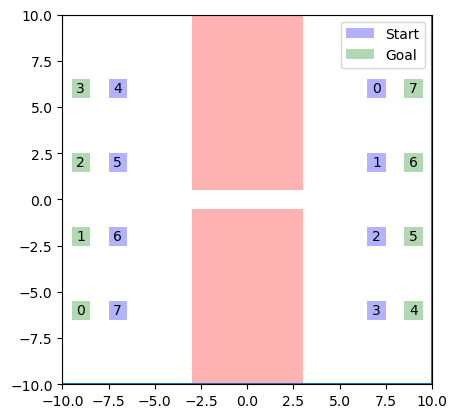

In [8]:
tunnel_length = 6
tunnel_width = 1 
env, HG = create_env(N,tunnel_width,tunnel_length)
   
ax = plt.gca()
draw_env(env,show_agent_ID=True)
plt.show() 

# Plotting

In [9]:
with open('./data/narrow_tunnel.pkl','rb') as fp:
    narrow_ts = pkl.load(fp)
with open('./data/wide_tunnel.pkl','rb') as fp:
    wide_ts = pkl.load(fp)

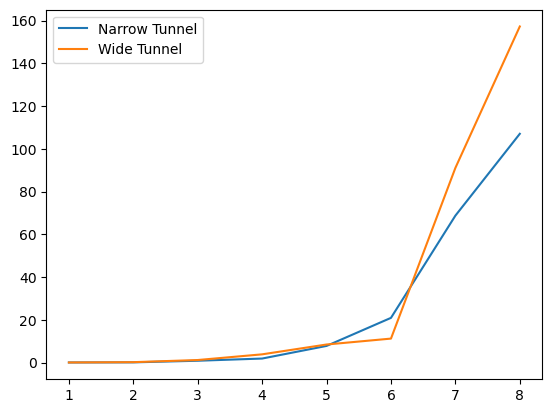

In [11]:
Ns = np.arange(N)+1
plt.plot(Ns,np.mean(narrow_ts,axis=0),label='Narrow Tunnel')
plt.plot(Ns,np.mean(wide_ts,axis=0),label='Wide Tunnel')
plt.legend()

# Conclusion

Inconclusive. Not enough numerical evidence shows narrow tunnel will pull down computation. 

Changing direction for next step: the narrative for narrow tunnel research will change. The variable that matters most for compute in MILP is the number of segments $N$. The reason hybrid-SIPP does well is because it uses small $N$ for multiple sub-segment planning, whereas full MILP planning uses a very large $N$ that contributes super-linearly in total compute. 